## Importing libraries

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
import warnings
warnings.filterwarnings("ignore")

In [4]:
import chardet

In [5]:
#with open('companies.csv','rb') as rawdata:
    #result = chardet.detect(rawdata.read())

In [6]:
#print(result)

### Importing companies.csv

In [7]:
companies = pd.read_csv('companies.csv',encoding='unicode_escape')
companies.head()

,permalink,name,homepage_url,category_list,status,country_code,state_code,region,city,founded_at
0,/Organization/-Fame,#fame,http://livfame.com,Media,operating,IND,16,Mumbai,Mumbai,NaN
1,/Organization/-Qounter,:Qounter,http://www.qounter.com,Application Platforms|Real Time|Social Network...,operating,USA,DE,DE - Other,Delaware City,04-09-2014
2,/Organization/-The-One-Of-Them-Inc-,"(THE) ONE of THEM,Inc.",http://oneofthem.jp,Apps|Games|Mobile,operating,NaN,NaN,NaN,NaN,NaN
3,/Organization/0-6-Com,0-6.com,http://www.0-6.com,Curated Web,operating,CHN,22,Beijing,Beijing,01-01-2007
4,/Organization/004-Technologies,004 Technologies,http://004gmbh.de/en/004-interact,Software,operating,USA,IL,"Springfield, Illinois",Champaign,01-01-2010


In [8]:
companies['permalink'].nunique()

66368

In [9]:
companies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 66368 entries, 0 to 66367
Data columns (total 10 columns):
permalink        66368 non-null object
name             66367 non-null object
homepage_url     61310 non-null object
category_list    63220 non-null object
status           66368 non-null object
country_code     59410 non-null object
state_code       57821 non-null object
region           58338 non-null object
city             58340 non-null object
founded_at       51147 non-null object
dtypes: object(10)
memory usage: 5.1+ MB


Data types are as expected for each column\
Checking for missing values

In [10]:
companies.isnull().sum()

permalink            0
name                 1
homepage_url      5058
category_list     3148
status               0
country_code      6958
state_code        8547
region            8030
city              8028
founded_at       15221
dtype: int64

In [11]:
companies['category_list'].value_counts().head(10)

Software               3995
Biotechnology          3615
E-Commerce             1332
Mobile                 1177
Clean Technology       1133
Curated Web            1050
Hardware + Software     932
Health Care             930
Games                   862
Enterprise Software     845
Name: category_list, dtype: int64

In [12]:
companies['country_code'].nunique()

137

There are 137 different countries present in the dataset

In [13]:
#with open("rounds2.csv","rb") as rawdata:
    #result = chardet.detect(rawdata.read())
#print(result)

### Importing rounds2.csv
- It contains funding amount data as well as funding type

In [14]:
rounds2 = pd.read_csv('rounds2.csv',encoding='palmos')
rounds2.head()

,company_permalink,funding_round_permalink,funding_round_type,funding_round_code,funded_at,raised_amount_usd
0,/organization/-fame,/funding-round/9a01d05418af9f794eebff7ace91f638,venture,B,05-01-2015,10000000.0
1,/ORGANIZATION/-QOUNTER,/funding-round/22dacff496eb7acb2b901dec1dfe5633,venture,A,14-10-2014,NaN
2,/organization/-qounter,/funding-round/b44fbb94153f6cdef13083530bb48030,seed,NaN,01-03-2014,700000.0
3,/ORGANIZATION/-THE-ONE-OF-THEM-INC-,/funding-round/650b8f704416801069bb178a1418776b,venture,B,30-01-2014,3406878.0
4,/organization/0-6-com,/funding-round/5727accaeaa57461bd22a9bdd945382d,venture,A,19-03-2008,2000000.0


Checking for null values

In [15]:
rounds2.isnull().sum()

company_permalink              0
funding_round_permalink        0
funding_round_type             0
funding_round_code         83809
funded_at                      0
raised_amount_usd          19990
dtype: int64

Percantage of missing values

In [16]:
print(round(rounds2.isnull().sum()/len(rounds2.index)*100,2))

company_permalink           0.00
funding_round_permalink     0.00
funding_round_type          0.00
funding_round_code         72.91
funded_at                   0.00
raised_amount_usd          17.39
dtype: float64


In [17]:
rounds2['company_permalink'].nunique()

90247

There are 90247 different companies in rounds2 dataset

In [18]:
rounds2['funding_round_type'].value_counts()

venture                  55494
seed                     30524
debt_financing            6895
angel                     6094
undisclosed               4897
equity_crowdfunding       3257
private_equity            2285
grant                     2200
convertible_note          1817
post_ipo_equity            638
product_crowdfunding       410
non_equity_assistance      191
post_ipo_debt              152
secondary_market            95
Name: funding_round_type, dtype: int64

From above list, it is evident that most of the investors are investing as through **venture** type of investment

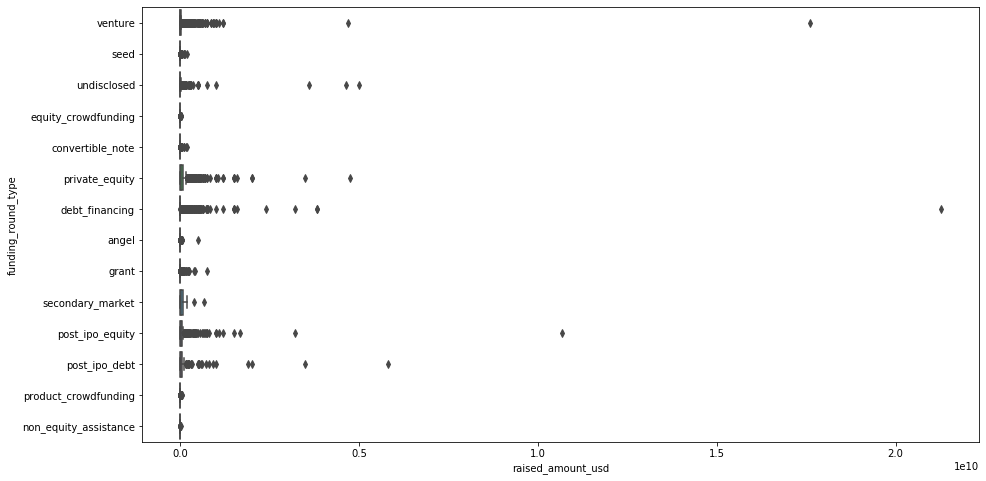

In [19]:
plt.figure(figsize=(15,8))
sns.boxplot(y='funding_round_type',x='raised_amount_usd',data=rounds2,orient='h')
plt.show()

Visualizing the investments below 15 million, which is the max limit for Sparks Fund

**Spark Fund** is only interested in common types of startup fundings like seed, angel, venture and private equity

For **venture** type of investment

In [20]:
#pd.options.display.float_format = "{:.2f}".format
pd.reset_option('display.float_format')
rounds2[rounds2['funding_round_type']=='venture'].describe()

,raised_amount_usd
count,5.022800e+04
mean,1.174895e+07
std,8.635207e+07
min,0.000000e+00
25%,1.600902e+06
50%,5.000000e+06
75%,1.200000e+07
max,1.760000e+10


For **seed** type of investment

In [21]:
rounds2[rounds2['funding_round_type']=='seed'].describe()

,raised_amount_usd
count,2.360300e+04
mean,7.198180e+05
std,2.221733e+06
min,0.000000e+00
25%,5.500000e+04
50%,2.750000e+05
75%,1.000000e+06
max,2.000000e+08


For **private equity** type of investment

In [22]:
rounds2[rounds2['funding_round_type']=='private_equity'].describe()

,raised_amount_usd
count,1.936000e+03
mean,7.330859e+07
std,1.981135e+08
min,0.000000e+00
25%,5.000000e+06
50%,2.000000e+07
75%,7.500000e+07
max,4.745460e+09


For **angel** type of investment

In [23]:
rounds2[rounds2['funding_round_type']=='angel'].describe()

,raised_amount_usd
count,4.860000e+03
mean,9.586945e+05
std,7.404397e+06
min,0.000000e+00
25%,1.500000e+05
50%,4.000000e+05
75%,1.000000e+06
max,4.945120e+08


In [24]:
pd.pivot_table(data=rounds2, index='funding_round_type',aggfunc=np.median).sort_values(by='raised_amount_usd',\
                                                                                      ascending=False)

,raised_amount_usd
funding_round_type,
secondary_market,32600000.0
private_equity,20000000.0
post_ipo_debt,19950000.0
post_ipo_equity,12262852.5
venture,5000000.0
debt_financing,1100000.0
undisclosed,1018680.0
angel,400000.0
seed,275000.0


## Conclusions

- As can be seen from above boxplot and also statistical details of each type of funding round, we can conclude that there are outliers in each type of funding. Hence we will consider median as the representative value.
- Hence we used pivot table to depict median of raised amount for each investment type in descending order
- The budget of Spark Fund is between 5 to 15 million USD, so only **post IPO equity** and **Venture** investment type satisfy this criteria
- Also Spark Fund wants to invest where most of the other investors are investing. Around 55 thousand investors are investing through **venture** type and only 638 investors invest via **post IPO equity** and also Spark Fund wants investment by only common types
- So Spark Fund should go for **Venture** investment.

## Country Analysis

#### Merging the two datasets

In [25]:
companies['permalink'] = companies['permalink'].apply(lambda x: x.lower())
rounds2['company_permalink'] = rounds2['company_permalink'].apply(lambda x: x.lower())

In [26]:
master_frame = pd.merge(companies,rounds2,how='inner',left_on='permalink',right_on='company_permalink')
master_frame.head()

,permalink,name,homepage_url,category_list,status,country_code,state_code,region,city,founded_at,company_permalink,funding_round_permalink,funding_round_type,funding_round_code,funded_at,raised_amount_usd
0,/organization/-fame,#fame,http://livfame.com,Media,operating,IND,16,Mumbai,Mumbai,NaN,/organization/-fame,/funding-round/9a01d05418af9f794eebff7ace91f638,venture,B,05-01-2015,10000000.0
1,/organization/-qounter,:Qounter,http://www.qounter.com,Application Platforms|Real Time|Social Network...,operating,USA,DE,DE - Other,Delaware City,04-09-2014,/organization/-qounter,/funding-round/22dacff496eb7acb2b901dec1dfe5633,venture,A,14-10-2014,NaN
2,/organization/-qounter,:Qounter,http://www.qounter.com,Application Platforms|Real Time|Social Network...,operating,USA,DE,DE - Other,Delaware City,04-09-2014,/organization/-qounter,/funding-round/b44fbb94153f6cdef13083530bb48030,seed,NaN,01-03-2014,700000.0
3,/organization/-the-one-of-them-inc-,"(THE) ONE of THEM,Inc.",http://oneofthem.jp,Apps|Games|Mobile,operating,NaN,NaN,NaN,NaN,NaN,/organization/-the-one-of-them-inc-,/funding-round/650b8f704416801069bb178a1418776b,venture,B,30-01-2014,3406878.0
4,/organization/0-6-com,0-6.com,http://www.0-6.com,Curated Web,operating,CHN,22,Beijing,Beijing,01-01-2007,/organization/0-6-com,/funding-round/5727accaeaa57461bd22a9bdd945382d,venture,A,19-03-2008,2000000.0


In [27]:
master_frame = master_frame.drop(['company_permalink'],axis=1)
master_frame.head()

,permalink,name,homepage_url,category_list,status,country_code,state_code,region,city,founded_at,funding_round_permalink,funding_round_type,funding_round_code,funded_at,raised_amount_usd
0,/organization/-fame,#fame,http://livfame.com,Media,operating,IND,16,Mumbai,Mumbai,NaN,/funding-round/9a01d05418af9f794eebff7ace91f638,venture,B,05-01-2015,10000000.0
1,/organization/-qounter,:Qounter,http://www.qounter.com,Application Platforms|Real Time|Social Network...,operating,USA,DE,DE - Other,Delaware City,04-09-2014,/funding-round/22dacff496eb7acb2b901dec1dfe5633,venture,A,14-10-2014,NaN
2,/organization/-qounter,:Qounter,http://www.qounter.com,Application Platforms|Real Time|Social Network...,operating,USA,DE,DE - Other,Delaware City,04-09-2014,/funding-round/b44fbb94153f6cdef13083530bb48030,seed,NaN,01-03-2014,700000.0
3,/organization/-the-one-of-them-inc-,"(THE) ONE of THEM,Inc.",http://oneofthem.jp,Apps|Games|Mobile,operating,NaN,NaN,NaN,NaN,NaN,/funding-round/650b8f704416801069bb178a1418776b,venture,B,30-01-2014,3406878.0
4,/organization/0-6-com,0-6.com,http://www.0-6.com,Curated Web,operating,CHN,22,Beijing,Beijing,01-01-2007,/funding-round/5727accaeaa57461bd22a9bdd945382d,venture,A,19-03-2008,2000000.0


In [28]:
master_frame['permalink'].nunique()

66343

Hence, we get total of 66343 companies which are common in both companies and rounds2 datasets

#### Now screening down to the companies which are funded by venture investment

In [29]:
master_frame = master_frame[master_frame['funding_round_type']=='venture']
master_frame.head()

,permalink,name,homepage_url,category_list,status,country_code,state_code,region,city,founded_at,funding_round_permalink,funding_round_type,funding_round_code,funded_at,raised_amount_usd
0,/organization/-fame,#fame,http://livfame.com,Media,operating,IND,16,Mumbai,Mumbai,NaN,/funding-round/9a01d05418af9f794eebff7ace91f638,venture,B,05-01-2015,10000000.0
1,/organization/-qounter,:Qounter,http://www.qounter.com,Application Platforms|Real Time|Social Network...,operating,USA,DE,DE - Other,Delaware City,04-09-2014,/funding-round/22dacff496eb7acb2b901dec1dfe5633,venture,A,14-10-2014,NaN
3,/organization/-the-one-of-them-inc-,"(THE) ONE of THEM,Inc.",http://oneofthem.jp,Apps|Games|Mobile,operating,NaN,NaN,NaN,NaN,NaN,/funding-round/650b8f704416801069bb178a1418776b,venture,B,30-01-2014,3406878.0
4,/organization/0-6-com,0-6.com,http://www.0-6.com,Curated Web,operating,CHN,22,Beijing,Beijing,01-01-2007,/funding-round/5727accaeaa57461bd22a9bdd945382d,venture,A,19-03-2008,2000000.0
5,/organization/004-technologies,004 Technologies,http://004gmbh.de/en/004-interact,Software,operating,USA,IL,"Springfield, Illinois",Champaign,01-01-2010,/funding-round/1278dd4e6a37fa4b7d7e06c21b3c1830,venture,NaN,24-07-2014,NaN


In [30]:
master_frame['permalink'].nunique()

32462

Hence, total of 32462 companies got funded by **venture** investment

Top 9 countries which are heavily invested in are as follows:

In [31]:
top9 = master_frame.groupby('country_code')['raised_amount_usd'].sum().sort_values(ascending=False).head(9)
top9

country_code
USA    4.225108e+11
CHN    3.983542e+10
GBR    2.024563e+10
IND    1.439186e+10
CAN    9.583332e+09
FRA    7.259537e+09
ISR    6.907515e+09
DEU    6.346960e+09
JPN    3.363677e+09
Name: raised_amount_usd, dtype: float64

Top 5 English speaking countries are:</br>
- USA
- England
- India
- Canada
- Israel

**Hence from the above analysis, it is evident that Spark Fund should invest in USA, England, India, Canada and Israel which are english speaking countries**

## Treating missing values

In [32]:
master_frame.isnull().sum()

permalink                      0
name                           0
homepage_url                2945
category_list               1129
status                         0
country_code                2869
state_code                  3789
region                      3548
city                        3548
founded_at                 11190
funding_round_permalink        0
funding_round_type             0
funding_round_code         24508
funded_at                      0
raised_amount_usd           5263
dtype: int64

In [33]:
print(round(master_frame.isnull().sum()/len(master_frame.index)*100,2))

permalink                   0.00
name                        0.00
homepage_url                5.31
category_list               2.03
status                      0.00
country_code                5.17
state_code                  6.83
region                      6.39
city                        6.39
founded_at                 20.17
funding_round_permalink     0.00
funding_round_type          0.00
funding_round_code         44.17
funded_at                   0.00
raised_amount_usd           9.49
dtype: float64


Hence there are 44% missing values in funding round code column which is the significant amount. Hence we will remove this column

In [34]:
master_frame = master_frame.drop('funding_round_code',axis=1)

Imputing NaNs of `raised_amount_usd` column by its median value

In [35]:
median = master_frame['raised_amount_usd'].median()
master_frame['raised_amount_usd'] = master_frame['raised_amount_usd'].fillna(median)
master_frame['raised_amount_usd'].isnull().sum()

0

Hence, we have imputed the `raised_amount-usd` column

Now again screening out `master_frame` dataset for above top 5 english speaking countries

In [36]:
top5 = ['USA','GBR','IND','ISR','CAN']
master_frame = master_frame[(master_frame['country_code']=='USA')|(master_frame['country_code']=='GBR')|\
                           (master_frame['country_code']=='IND')|(master_frame['country_code']=='ISR')|\
                           (master_frame['country_code']=='CAN')]
master_frame['country_code'].value_counts()

USA    38372
GBR     2303
CAN     1346
IND      992
ISR      910
Name: country_code, dtype: int64

In [37]:
companies['category_list'].value_counts()

Software                                                                   3995
Biotechnology                                                              3615
E-Commerce                                                                 1332
Mobile                                                                     1177
Clean Technology                                                           1133
                                                                           ... 
Audio|Displays|Hardware|Mobile|Video                                          1
Corporate Wellness|Enterprise Software|Internet of Things|Smart Grid          1
Entertainment|Events|Software                                                 1
Domains|Finance|FinTech|Publishing                                            1
E-Commerce|Government Innovation|Payments|Property Management|Utilities       1
Name: category_list, Length: 27296, dtype: int64

## Sector Analysis
**mapping** file contains all types of categories and their respective **main sectors**

In [38]:
mapping = pd.read_csv('mapping.csv')
mapping.head()

,category_list,Automotive & Sports,Blanks,Cleantech / Semiconductors,Entertainment,Health,Manufacturing,"News, Search and Messaging",Others,"Social, Finance, Analytics, Advertising"
0,NaN,0,1,0,0,0,0,0,0,0
1,3D,0,0,0,0,0,1,0,0,0
2,3D Printing,0,0,0,0,0,1,0,0,0
3,3D Technology,0,0,0,0,0,1,0,0,0
4,Accounting,0,0,0,0,0,0,0,0,1


Dropping `NaN` row and `Blanks` column as they are of no significance

In [39]:
mapping = mapping.iloc[1:,:].drop('Blanks',axis=1)
mapping.head()

,category_list,Automotive & Sports,Cleantech / Semiconductors,Entertainment,Health,Manufacturing,"News, Search and Messaging",Others,"Social, Finance, Analytics, Advertising"
1,3D,0,0,0,0,1,0,0,0
2,3D Printing,0,0,0,0,1,0,0,0
3,3D Technology,0,0,0,0,1,0,0,0
4,Accounting,0,0,0,0,0,0,0,1
5,Active Lifestyle,0,0,0,1,0,0,0,0


In [40]:
mapping['category_list'].unique()

array(['3D', '3D Printing', '3D Technology', 'Accounting',
       'Active Lifestyle', 'Ad Targeting', 'Advanced Materials',
       'Adventure Travel', 'Advertising', 'Advertising Exchanges',
       'Advertising Networks', 'Advertising Platforms', 'Advice',
       'Aerospace', 'Agriculture', 'Air Pollution Control', 'Algorithms',
       'All Markets', 'All Students', 'Alter0tive Medicine', 'Alumni',
       'A0lytics', 'Android', 'Angels', 'Animal Feed',
       'Anything Capital Intensive', 'App Discovery', 'App Marketing',
       'App Stores', 'Application Performance Monitoring',
       'Application Platforms', 'Apps', 'Aquaculture', 'Architecture',
       'Archiving', 'Art', 'Artificial Intelligence', 'Artists Globally',
       'Assisitive Technology', 'Assisted Living', 'Auctions', 'Audio',
       'Audiobooks', 'Augmented Reality', 'Auto', 'Automated Kiosk',
       'Automotive', 'B2B', 'B2B Express Delivery', 'Babies',
       'Baby Accessories', 'Baby Boomers', 'Baby Safety', 'Bankin

From above array we see that in place of 'na' there is '0' in every string. For example, 'Analytics' is written as 'A0lytics' and so on\
We will deal with this using `replace` command

In [41]:
mapping['category_list'] = mapping['category_list'].apply(lambda x: x.replace('0','na'))

Looking at `companies.csv` file

In [42]:
companies.head()

,permalink,name,homepage_url,category_list,status,country_code,state_code,region,city,founded_at
0,/organization/-fame,#fame,http://livfame.com,Media,operating,IND,16,Mumbai,Mumbai,NaN
1,/organization/-qounter,:Qounter,http://www.qounter.com,Application Platforms|Real Time|Social Network...,operating,USA,DE,DE - Other,Delaware City,04-09-2014
2,/organization/-the-one-of-them-inc-,"(THE) ONE of THEM,Inc.",http://oneofthem.jp,Apps|Games|Mobile,operating,NaN,NaN,NaN,NaN,NaN
3,/organization/0-6-com,0-6.com,http://www.0-6.com,Curated Web,operating,CHN,22,Beijing,Beijing,01-01-2007
4,/organization/004-technologies,004 Technologies,http://004gmbh.de/en/004-interact,Software,operating,USA,IL,"Springfield, Illinois",Champaign,01-01-2010


Extracting the **Main Category** from the `category_list` column of `companies.csv`

NaN values under `category_list` should be dealt with so as to extract **main category** 

In [43]:
companies['main_category'] = companies['category_list'].apply(lambda x: x.split('|')[0])
companies['category_list'].isnull().sum()

3148

In [44]:
companies = companies[~pd.isnull(companies['category_list'])]
companies['primary_sector'] = companies['category_list'].apply(lambda x: x.split('|')[0])
companies.head()

,permalink,name,homepage_url,category_list,status,country_code,state_code,region,city,founded_at,primary_sector
0,/organization/-fame,#fame,http://livfame.com,Media,operating,IND,16,Mumbai,Mumbai,NaN,Media
1,/organization/-qounter,:Qounter,http://www.qounter.com,Application Platforms|Real Time|Social Network...,operating,USA,DE,DE - Other,Delaware City,04-09-2014,Application Platforms
2,/organization/-the-one-of-them-inc-,"(THE) ONE of THEM,Inc.",http://oneofthem.jp,Apps|Games|Mobile,operating,NaN,NaN,NaN,NaN,NaN,Apps
3,/organization/0-6-com,0-6.com,http://www.0-6.com,Curated Web,operating,CHN,22,Beijing,Beijing,01-01-2007,Curated Web
4,/organization/004-technologies,004 Technologies,http://004gmbh.de/en/004-interact,Software,operating,USA,IL,"Springfield, Illinois",Champaign,01-01-2010,Software


Converting ***mapping*** dataframe from wide format to long format

In [45]:
id_vars = ['category_list']
value_vars = list(mapping.columns[1:])
print(id_vars)
print(value_vars)

['category_list']
['Automotive & Sports', 'Cleantech / Semiconductors', 'Entertainment', 'Health', 'Manufacturing', 'News, Search and Messaging', 'Others', 'Social, Finance, Analytics, Advertising']


In [46]:
mapping = pd.melt(mapping, id_vars, value_vars, var_name='main_sector')
mapping.head()

,category_list,main_sector,value
0,3D,Automotive & Sports,0
1,3D Printing,Automotive & Sports,0
2,3D Technology,Automotive & Sports,0
3,Accounting,Automotive & Sports,0
4,Active Lifestyle,Automotive & Sports,0


In [47]:
mapping = mapping[mapping['value']==1]
mapping.head()

,category_list,main_sector,value
7,Adventure Travel,Automotive & Sports,1
13,Aerospace,Automotive & Sports,1
44,Auto,Automotive & Sports,1
45,Automated Kiosk,Automotive & Sports,1
46,Automotive,Automotive & Sports,1


In [48]:
mapping = mapping.drop('value',axis=1)
mapping.head()

,category_list,main_sector
7,Adventure Travel,Automotive & Sports
13,Aerospace,Automotive & Sports
44,Auto,Automotive & Sports
45,Automated Kiosk,Automotive & Sports
46,Automotive,Automotive & Sports


In [49]:
mapping['main_sector'].unique()

array(['Automotive & Sports', 'Cleantech / Semiconductors',
       'Entertainment', 'Health', 'Manufacturing',
       'News, Search and Messaging', 'Others',
       'Social, Finance, Analytics, Advertising'], dtype=object)

In [50]:
sector_df = pd.merge(companies.drop('category_list',axis=1),mapping,how='inner',left_on='primary_sector',\
                     right_on='category_list')
# Dropping the 'category_list' column which will be redundant in sector_df dataframe
sector_df = sector_df.drop('category_list',axis=1)
sector_df.head()

,permalink,name,homepage_url,status,country_code,state_code,region,city,founded_at,primary_sector,main_sector
0,/organization/-fame,#fame,http://livfame.com,operating,IND,16,Mumbai,Mumbai,NaN,Media,Entertainment
1,/organization/90min,90min,http://www.90min.com,operating,GBR,H9,London,London,01-01-2011,Media,Entertainment
2,/organization/a-b-productions,A.B Productions,NaN,operating,USA,CA,Los Angeles,Los Angeles,11-12-2012,Media,Entertainment
3,/organization/a-dance-for-me,A Dance for Me,http://www.adanceforme.com/,operating,USA,MT,Missoula,Missoula,31-07-2011,Media,Entertainment
4,/organization/ace-film-productions,ACE Film Productions,NaN,operating,USA,NJ,Newark,Newark,01-06-2011,Media,Entertainment


In [51]:
sector_df.shape

(63006, 11)

Top 3 English speaking countries are: </br>
1. USA
2. England
3. India\
We need to find most heavily invested sector in these top 3 english speaking countries for **venture** funding type and investment amount of **5 million USD** which is the representative value for investment as shown earlier

Let **D1** dataframe be for **USA**, **D2** for **England** and **D3** for **India** \
`sector_df` dataframe contains all companies. But we need companies which are fuded through **Venture** investment and whose investment amount is between 5 to 15 million USD\
Hence, we can again merge `sector_df` dataframe with `master_frame` dataframe \
In `mater_frame` dataframe we will merge on `permalink` column and added column in `sector_df` will be **raised_amount_usd** and **funding_round_permalink** (which is unique for each funding transaction)

In [52]:
sector_df = pd.merge(master_frame.loc[:,['permalink','funding_round_permalink','raised_amount_usd']],sector_df,how='inner')
sector_df.tail()

,permalink,funding_round_permalink,raised_amount_usd,name,homepage_url,status,country_code,state_code,region,city,founded_at,primary_sector,main_sector
43326,/organization/zyomyx-inc,/funding-round/4191cb5258d3863b0212d1083881da64,12000000.0,ZYOMYX,http://www.zyomyx.com,operating,USA,MO,MO - Other,Fremont,01-01-1998,Biotechnology,Cleantech / Semiconductors
43327,/organization/zyomyx-inc,/funding-round/b4fce7f8a13267353d57db09099800e8,14219999.0,ZYOMYX,http://www.zyomyx.com,operating,USA,MO,MO - Other,Fremont,01-01-1998,Biotechnology,Cleantech / Semiconductors
43328,/organization/zyomyx-inc,/funding-round/ea5b21da6cf999ff4d5667431fe318d7,555016.0,ZYOMYX,http://www.zyomyx.com,operating,USA,MO,MO - Other,Fremont,01-01-1998,Biotechnology,Cleantech / Semiconductors
43329,/organization/zyrra,/funding-round/7a0fa791c96c9c447ee54662395beab9,140500.0,Zyrra,http://www.zyrra.com,operating,USA,MA,Boston,Cambridge,NaN,E-Commerce,Others
43330,/organization/zystor,/funding-round/7ea37c0ff4132b084832039a9380d34e,8500000.0,Zystor,http://www.zystor.com,acquired,USA,WI,Milwaukee,Milwaukee,NaN,Biotechnology,Cleantech / Semiconductors


In [53]:
D1 = sector_df[sector_df['country_code']=='USA']
D2 = sector_df[sector_df['country_code']=='GBR']
D3 = sector_df[sector_df['country_code']=='IND']

## For USA

In [54]:
D1.head()

,permalink,funding_round_permalink,raised_amount_usd,name,homepage_url,status,country_code,state_code,region,city,founded_at,primary_sector,main_sector
1,/organization/-qounter,/funding-round/22dacff496eb7acb2b901dec1dfe5633,5000000.0,:Qounter,http://www.qounter.com,operating,USA,DE,DE - Other,Delaware City,04-09-2014,Application Platforms,"News, Search and Messaging"
2,/organization/004-technologies,/funding-round/1278dd4e6a37fa4b7d7e06c21b3c1830,5000000.0,004 Technologies,http://004gmbh.de/en/004-interact,operating,USA,IL,"Springfield, Illinois",Champaign,01-01-2010,Software,Others
4,/organization/0xdata,/funding-round/3bb2ee4a2d89251a10aaa735b1180e44,20000000.0,H2O.ai,http://h2o.ai/,operating,USA,CA,SF Bay Area,Mountain View,01-01-2011,Analytics,"Social, Finance, Analytics, Advertising"
5,/organization/0xdata,/funding-round/ae2a174c06517c2394aed45006322a7e,1700000.0,H2O.ai,http://h2o.ai/,operating,USA,CA,SF Bay Area,Mountain View,01-01-2011,Analytics,"Social, Finance, Analytics, Advertising"
6,/organization/0xdata,/funding-round/e1cfcbe1bdf4c70277c5f29a3482f24e,8900000.0,H2O.ai,http://h2o.ai/,operating,USA,CA,SF Bay Area,Mountain View,01-01-2011,Analytics,"Social, Finance, Analytics, Advertising"


In [55]:
usa = D1.groupby('main_sector')['permalink'].count().sort_values(ascending=False)
usa

main_sector
Others                                     8763
Cleantech / Semiconductors                 8121
Social, Finance, Analytics, Advertising    7822
News, Search and Messaging                 4612
Health                                     3413
Manufacturing                              2643
Entertainment                              1927
Automotive & Sports                         566
Name: permalink, dtype: int64

In [56]:
D1.shape

(37867, 13)

Total amount of investment (in USD) in USA

In [57]:
total = D1['raised_amount_usd'].sum()
print('Total amount invested in USA: {} USD'.format(total))

Total amount invested in USA: 428984835068.0 USD


**Top 5 companies in 'Others' sector which got highest investment**

In [58]:
D1[D1['main_sector']=='Others'].groupby('name')['raised_amount_usd'].sum().sort_values(ascending=False).head(5)

name
SoFi            1.365200e+09
Snapchat        1.165100e+09
LivingSocial    8.182250e+08
Facebook        6.152000e+08
Zenefits        5.815000e+08
Name: raised_amount_usd, dtype: float64

**Top 5 companies in 'Cleantech / Semiconductors' sector which got highest investment**

In [59]:
D1[D1['main_sector']=='Cleantech / Semiconductors'].groupby('name')['raised_amount_usd'].sum().\
sort_values(ascending=False).head(5)

name
Freescale Semiconductor    1.760000e+10
Juno Therapeutics          1.159803e+09
Better Place               7.750000e+08
BrightSource Energy        5.870000e+08
GreatPoint Energy          5.670000e+08
Name: raised_amount_usd, dtype: float64

## For England

In [60]:
gbr = D2.groupby('main_sector')['permalink'].count().sort_values(ascending=False)
gbr

main_sector
Others                                     580
Social, Finance, Analytics, Advertising    481
Cleantech / Semiconductors                 460
News, Search and Messaging                 265
Entertainment                              160
Manufacturing                              132
Health                                     126
Automotive & Sports                         54
Name: permalink, dtype: int64

In [61]:
D2.shape

(2258, 13)

Total amount of investment (in USD) in England

In [62]:
total = D2['raised_amount_usd'].sum()
print('Total amount invested in England: {} USD'.format(total))

Total amount invested in England: 21098803406.0 USD


**Top 5 companies in 'Others' sector which got highest investment**

In [63]:
D2[D2['main_sector']=='Others'].groupby('name')['raised_amount_usd'].sum().sort_values(ascending=False).head(5)

name
OneWeb            500000000.0
Farfetch          194500000.0
Liquid Telecom    150000000.0
picoChip          111500000.0
NewVoiceMedia     111300000.0
Name: raised_amount_usd, dtype: float64

**Top 5 companies in 'Social, Finance, Analytics, Advertising' sector which got highest investment**

In [64]:
D2[D2['main_sector']=='Social, Finance, Analytics, Advertising'].groupby('name')['raised_amount_usd'].sum().\
sort_values(ascending=False).head(5)

name
Powa Technologies    176700000.0
Borro                171572758.0
Wonga                155393366.0
WorldRemit           147109000.0
Mereo                119000000.0
Name: raised_amount_usd, dtype: float64

## For India

In [65]:
ind = D3.groupby('main_sector')['permalink'].count().sort_values(ascending=False)
ind

main_sector
Others                                     332
Social, Finance, Analytics, Advertising    193
News, Search and Messaging                 154
Entertainment                               90
Manufacturing                               64
Cleantech / Semiconductors                  63
Health                                      56
Automotive & Sports                         32
Name: permalink, dtype: int64

In [66]:
D3.shape

(984, 13)

Total amount invested (in USD) in India

In [67]:
total = D3['raised_amount_usd'].sum()
print('Total amount invested in India: {} USD'.format(total))

Total amount invested in India: 15086508718.0 USD


**Top 5 companies in 'Others' sector which got highest investment**

In [68]:
D3[D3['main_sector']=='Others'].groupby('name')['raised_amount_usd'].sum().sort_values(ascending=False).head(5)

name
Flipkart             2.451000e+09
Snapdeal             3.207000e+08
Tata Teleservices    2.120000e+08
Myntra               1.587500e+08
Pepperfry.com        1.280000e+08
Name: raised_amount_usd, dtype: float64

**Top 5 companies in 'Social, Finance, Analytics, Advertising' sector which got highest investment**

In [69]:
D3[D3['main_sector']=='Social, Finance, Analytics, Advertising'].groupby('name')['raised_amount_usd'].sum().\
sort_values(ascending=False).head(5)

name
ShopClues.com             129000000.0
LYCOS Internet Limited    103000000.0
yepme.com                  88200000.0
BankBazaar.com             79000000.0
PolicyBazaar               69600000.0
Name: raised_amount_usd, dtype: float64

## Data Visualization

### Investment Analysis

**Spark Fund** wants to invest by common startup funding types like seed, venture, angel and private equity\
Hence we will use box plots for representation of funding amount 

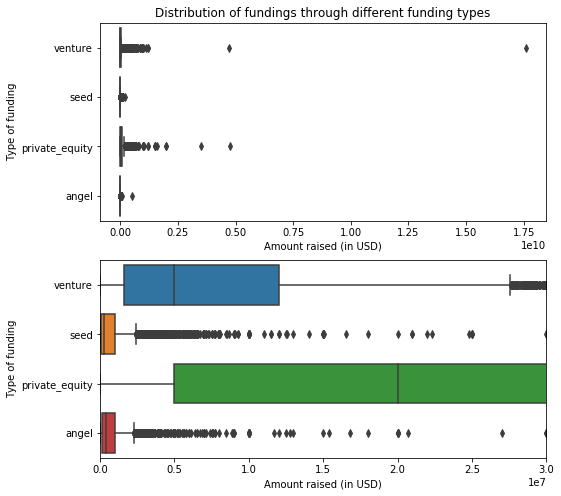

In [70]:
invest_types = ['seed','angel','venture','private_equity']
rounds2_new = rounds2[rounds2['funding_round_type'].isin(invest_types)]
plt.figure(figsize=(8,8))
plt.subplot(2,1,1)
plot1 = sns.boxplot(y='funding_round_type',x='raised_amount_usd',data=rounds2_new,orient='h')
plt.ylabel('Type of funding')
plt.xlabel('Amount raised (in USD)')
plt.title('Distribution of fundings through different funding types')
plt.subplot(2,1,2)
plot2 = sns.boxplot(y='funding_round_type',x='raised_amount_usd',data=rounds2_new,orient='h')
plt.ylabel('Type of funding')
plt.xlabel('Amount raised (in USD)')
#plt.title('Distribution of fundings through different funding types')
plot2.set(xlim=(0,30000000))
plt.show()

First graph shows boxplot of amount raised vs types of funding for all the amount of investments\
As max limit for investment in 15 million USD as stated in problem statement, we zoomed in the boxplot to get clear view of data\
Hence it is evident from the data that median of **venture** is 5 million USD while for other investment types, median doesn't lie in the range of 5-15 million USD
Thus venture investment is preffered

**OR**\
We can also use barplot with estimator as *np.median*\
From below plot we get clear idea that all other funding types except **venture** have median value out of range of 5-15 million USD 

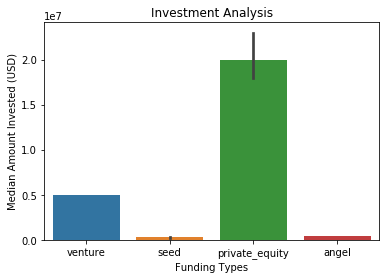

In [71]:
sns.barplot(x='funding_round_type',y='raised_amount_usd',data=rounds2_new,estimator=np.median)
plt.xlabel('Funding Types')
plt.ylabel('Median Amount Invested (USD)')
plt.title('Investment Analysis')
plt.show()

### Country Analysis

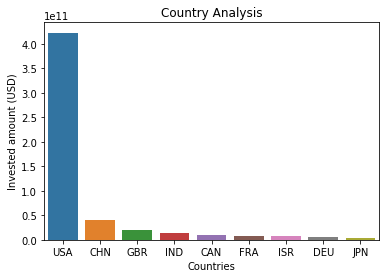

In [72]:
sns.barplot(x=top9.index,y=top9)
plt.xlabel('Countries')
plt.ylabel('Invested amount (USD)')
plt.title('Country Analysis')
plt.show()

### Sector Analysis

Consider top 3 English speaking countries USA, England and India where investment amount is higher as compared to other English speaking countries\
Converting above Series (usa,gbr,ind) to dataframe and concatenate them and create new dataframe `top3` containing top 3 sectors of top3 english speaking countries and doing some hardcoding for `country` column

In [73]:
usa = usa.to_frame()
gbr = gbr.to_frame()
ind = ind.to_frame()

In [74]:
top3 = pd.concat([usa.iloc[:3,:],gbr.iloc[:3,:],ind.iloc[:3,:]])
# doing some hardcoding
top3['country'] = ['USA','USA','USA','England','England','England','India','India','India']
top3 = top3.reset_index()
top3

,main_sector,permalink,country
0,Others,8763,USA
1,Cleantech / Semiconductors,8121,USA
2,"Social, Finance, Analytics, Advertising",7822,USA
3,Others,580,England
4,"Social, Finance, Analytics, Advertising",481,England
5,Cleantech / Semiconductors,460,England
6,Others,332,India
7,"Social, Finance, Analytics, Advertising",193,India
8,"News, Search and Messaging",154,India


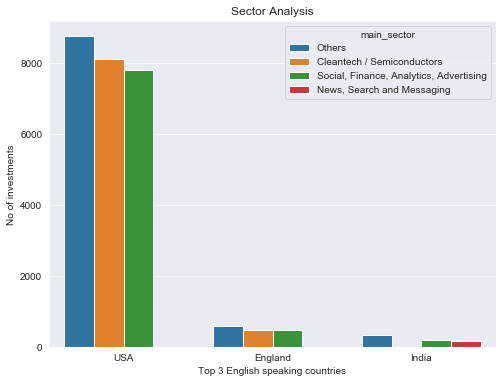

In [76]:
plt.figure(figsize=(8,6))
sns.set_style('darkgrid')
sns.barplot(x='country',y='permalink',hue='main_sector',data=top3)
plt.xlabel('Top 3 English speaking countries')
plt.ylabel('No of investments')
plt.title('Sector Analysis')
plt.show()